<p style="text-align: center;font-size: 40pt">Robot Operating System</p>
<p style="text-align: center;font-size: 20pt">Overview of ROS</p>
<img src="images/ros_equation.png" width="100%" alt="Retrieved from ros.org">

For this short introduction to ROS (Robot Operating System), we are taking inspiration from the [Programming for Robotics - ROS](https://rsl.ethz.ch/education-students/lectures/ros.html) course taught at ETH Zürich.
Although that course focuses on mobile robots, it is still a good idea to read through their slides for their [lecture 1](https://ethz.ch/content/dam/ethz/special-interest/mavt/robotics-n-intelligent-systems/rsl-dam/ROS2020/ROS%20Course%20Slides%20Course%201.pdf) that gives a nice overview of the ROS system from the user point of view.
Our course does not expect you to program robots, therefore you can skim through those parts where they talk about package structure, C++ and such.

# What is ROS

Robot Operating System (ROS) is a set of libraries, tools and defined APIs intended to make one's life easier when building a robot.
See for yourself how the authors introduce ROS on [ros.org](https://www.ros.org/about-ros/).
The native system ROS is made for Ubuntu, but many other systems are officially and unofficially supported.
Programming languages ROS is intended to work with are C++, Python and Lisp.
Yet again, more environments are available (e.g., interfaces for Java or toolboxes for Matlab).
However, to use ROS, you don't need to program anything.
You can just install it and use its tools, which are now, after 13 years of development, plentiful.
ROS is currently supported and maintained by the [Open Source Robotics Foundation](https://www.openrobotics.org/).

# A remote controlled car example

If you decide to build a robotic system, you will soon realize that it needs to perform many different tasks.
Let's say you want to make a remote controlled (RC) car to have some fun driving around your house.
Apart from the hardware, which you can find in many online shops, you will need to deal with software that puts all the hardware together.
To make the RC car move, you need to have some process controlling the motors and the steering servo.
Then you need to somehow transmit steering commands from the user's joystick to this motor-controlling process.
Finally, you will need to capture images by a camera on the RC car, transmit and display them to the user to close the loop.
It should look like this:

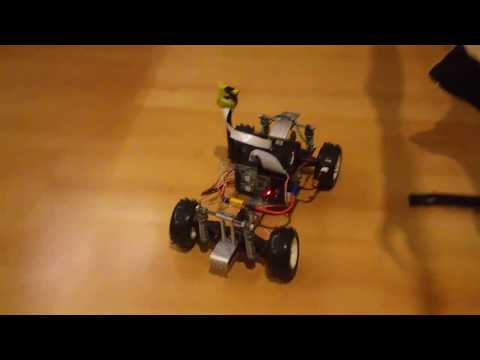

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('M1RSWC-Lv1M', width=720, height=480)

If you choose to do all of these tasks by yourself from scratch, you can expect spending weeks designing and programming.
On the other hand, using ROS resembles making something from LEGO bricks.
Many of the small components are already there, someone needed them, programmed them and shared them with the rest of the robotic community.
You still need to write small pieces of code which are unique to your project (e.g., the process which sends commands to the motor controller and to the servomotors), but you can already run a different process that reads joystick inputs on the user's laptop.
This one is already available in ROS, which also handles the communication between your process and the joystick process, even over a Wi-Fi network.
All you need to do in your code is to prepare one function, which receives steering message in a standard ROS format, and decides what speed the motor should turn and what angle the steering servo should bet set to.
The video transmission is even easier, you would run one process which reads the camera data on the car and one which displays the video stream on the laptop of the user.
All those modules are ready to be used in ROS, for free and open-source.

Eventually, you can use **the same tools** for slightly more impressive robots...


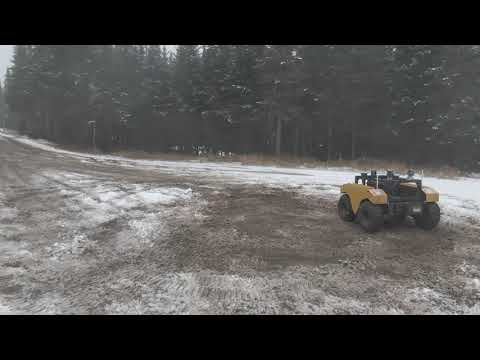

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('p3VPOrsGMJQ', width=720, height=480)

# Starting with ROS

From our experience, there is no better way to learn using ROS than the [official tutorials](http://wiki.ros.org/ROS/Tutorials).
There is 20 beginner tutorials, but before you go ahead and click on the link, we curated a subset of lessons for the specific need of this lecture.
For our introduction to ROS, we will focus on using ROS instead of going deep into programming.
Therefore, we select only a subset of tutorials which are useful in this stage.
Note that our ROS distribution is called _Melodic_, which is the latest, long-term-supported one.

**Pro tip**: You will be using terminals a lot, the quick way to open one is by pressing `CTRL+ALT+T`.
A quick way to close a terminal is by pressing `CTRL+D`, but without any program currently running in that terminal.
To limit the number of windows on your screen, you can open tabs in one terminal window by pressing `CTRL+SHIFT+T`.
Try all of these.

## A tutorial to read

1. [Installing and Configuring Your ROS Environment](http://wiki.ros.org/ROS/Tutorials/InstallingandConfiguringROSEnvironment) describes how to setup a ROS _workspace_.
That sounds fancy, but it really is just a folder where you put your code and where ROS can find it and compile it for you.
You can read through this tutorial, but you don't have to create any workspaces, there is one already prepared in your virtual machine in `/home/student/percep3d_workspace/catkin_workspace`.
It is split into `catkin_workspace` which contains pure ROS packages and into `external_libraries` which includes mapping libraries used by the packages from the `catkin_workspace`.
For experts: you can inspect the end of the `.bashrc` file in the home folder to see how we _source_ these two workspaces.

## Important tutorials

1. [Navigating the ROS Filesystem](http://wiki.ros.org/ROS/Tutorials/NavigatingTheFilesystem) explains navigation tools in the terminal. 
One important command you want to learn to use is `roscd`, and also the trick with using the tab key to auto-complete long names.

1. Do not skip the next tutorial, [Understanding ROS Nodes](http://wiki.ros.org/ROS/Tutorials/UnderstandingNodes), because no ROS user is truly complete without trying the turtle simulator. Apart from the graphics wonder the simulator is, this tutorial also teaches you what they mean by a ROS _node_ and other useful stuff you should know.

1. Now, you are ready for the core knowledge, necessary to be able to inspect communication between running ROS nodes. [Understanding ROS Topics](http://wiki.ros.org/ROS/Tutorials/UnderstandingTopics) takes you and your new friend the Turtle through listening and publishing messages on ROS topics. 
This one is important, so focus!

<img src="images/turtle.png" width="50%" style="display:block; margin: 0 auto;" />

## Tutorials you can skip

1. [Creating a ROS Package](http://wiki.ros.org/ROS/Tutorials/CreatingPackage) would teach you how to create a ROS package, which the basic unit in code organization, as ROS defines it. A package is pretty much a folder with source code and a few text files describing what the package does and what it depends on. __You can skip this tutorial since we will not be creating new packages in this course__. If you were interested to try it anyway, keep in mind that our workspace is not at `~/catkin_ws/src` as they expect it to be from the first tutorial, but at `~/percep3d_workspace/catkin_workspace/src`.

1. [Building a ROS Package](http://wiki.ros.org/ROS/Tutorials/BuildingPackages) teaches you how to compile code in your workspace. __Again, you can skip this tutorial for the same reason as the previous one__. Otherwise if you really want to go through it, use `catkin_make -j 2` command with the extra parameter, which tells the build system to use maximum two threads to compile the code. This prevents the virtual machine running out of memory - compilation is generally very RAM-expensive, especially when you try to do it four or eight times in parallel... The second workspace we have prepared - the `external_libraries` - was compiled calling the `catkin_make_isolated -j 2` command. There should be no need to recompile this workspace though, the libraries are up-to-date.

# Good job, now you can ROS!

After going through this lesson, you now have a concept of what ROS is. Try out the related [exercise](../../exercises/ros/1e-exercises_basics.ipynb) to get your head around it.
Then, continue with the [next lesson](2-lesson-ros-rviz.ipynb) to see how to visualize 3D data (good news, not everything is done in terminal in ROS ;).

&#8635; [Go back to the list of lessons](0-overview.ipynb)